### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### READING THE DATA

In [2]:
df=pd.read_csv("D:/DATA SCIENCE/Kaggle Projects/HOLIDAY PACKAGE PREDICTION/Travel.csv")

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### DIMENSIONS OF DATA

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

(4888, 20)

### STATISTICAL DESCRIPTION OF DATA

In [5]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### MISSING VALUES ANALYSIS

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
total_nulls = df.isnull().sum().sort_values(ascending = False)          

percent_null = round(((total_nulls)*100/df.isnull().count()),2)  
percent_null = percent_null.sort_values(ascending = False) 

missing_values = pd.concat([total_nulls, percent_null], axis = 1, keys = ['Total Nulls', 'Percentage of Missing Values'])    
missing_values['Data Type'] = df[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of Missing Values,Data Type
DurationOfPitch,251,5.14,float64
MonthlyIncome,233,4.77,float64
Age,226,4.62,float64
NumberOfTrips,140,2.86,float64
NumberOfChildrenVisiting,66,1.35,float64
NumberOfFollowups,45,0.92,float64
PreferredPropertyStar,26,0.53,float64
TypeofContact,25,0.51,object
Passport,0,0.00,int64
MaritalStatus,0,0.00,object


### NULL VALUES TREATMENT

In [8]:
df.DurationOfPitch.mean()

15.490834591330602

In [9]:
df.DurationOfPitch.median()

13.0

<function matplotlib.pyplot.show(close=None, block=None)>

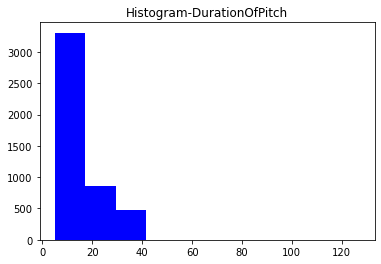

In [10]:
##Histogram
plt.hist(df.DurationOfPitch,color='blue')
plt.title('Histogram-DurationOfPitch')
plt.show

In [11]:
df.DurationOfPitch=df.DurationOfPitch.fillna(df.DurationOfPitch.median())

In [12]:
df.MonthlyIncome.mean()

23619.85349087003

In [13]:
df.MonthlyIncome.median()

22347.0

<function matplotlib.pyplot.show(close=None, block=None)>

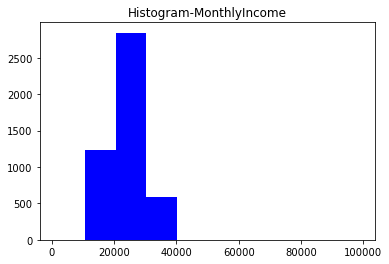

In [14]:
##Histogram
plt.hist(df.MonthlyIncome,color='blue')
plt.title('Histogram-MonthlyIncome')
plt.show

In [15]:
df.MonthlyIncome=df.MonthlyIncome.fillna(df.MonthlyIncome.mean())

In [16]:
df.Age.median()

36.0

In [17]:
df.Age.mode()

0    35.0
dtype: float64

In [18]:
df.Age=df.Age.fillna(df.Age.median())

In [19]:
df.NumberOfTrips.mode()

0    2.0
dtype: float64

In [20]:
df.NumberOfTrips.median()

3.0

In [21]:
df.NumberOfTrips=df.NumberOfTrips.fillna(2.0)

In [22]:
df.NumberOfChildrenVisiting.median()

1.0

In [23]:
df.NumberOfChildrenVisiting.mode()

0    1.0
dtype: float64

In [24]:
df.NumberOfChildrenVisiting=df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.median())

In [25]:
df.NumberOfFollowups.median()

4.0

In [26]:
df.NumberOfFollowups.mode()

0    4.0
dtype: float64

In [27]:
df.NumberOfFollowups=df.NumberOfFollowups.fillna(df.NumberOfFollowups.median())

In [28]:
df.PreferredPropertyStar.median()

3.0

In [29]:
df.PreferredPropertyStar.mode()

0    3.0
dtype: float64

In [30]:
df.PreferredPropertyStar=df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.median())

In [31]:
df.TypeofContact.mode()

0    Self Enquiry
dtype: object

In [32]:
df.TypeofContact=df.TypeofContact.fillna("Self Enquiry")

In [33]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [34]:
df.ProdTaken.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

Text(0.5, 1.0, 'ProdTaken counting')

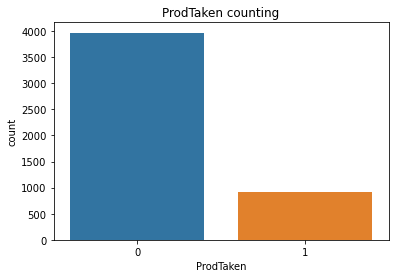

In [35]:
sns.countplot(x='ProdTaken',data=df)
plt.xlabel=("ProdTaken")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("ProdTaken counting")

In [36]:
df.ProdTaken.describe()

count    4888.000000
mean        0.188216
std         0.390925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ProdTaken, dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

<function matplotlib.pyplot.show(close=None, block=None)>

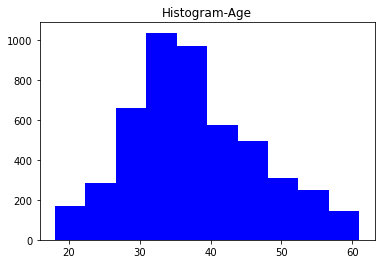

In [38]:
##Histogram
plt.hist(df.Age,color='blue')
plt.title('Histogram-Age')
plt.show

<AxesSubplot:>

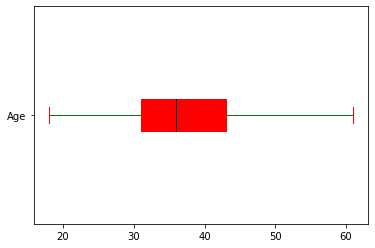

In [39]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Age.plot.box(color=props2, patch_artist = True, vert = False)

In [40]:
df.groupby("ProdTaken")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
ProdTaken,,,,,,,,
0,3968.0,38.177419,8.811116,18.0,32.0,36.0,44.0,61.0
1,920.0,34.829348,9.828021,18.0,28.0,33.0,41.0,60.0


In [41]:
df.TypeofContact.value_counts()

Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64

Text(0.5, 1.0, 'Type of Contact counting')

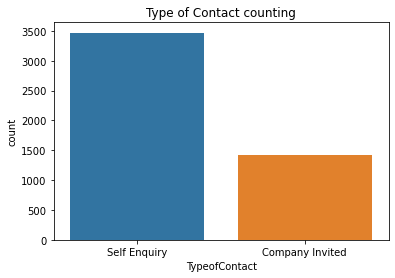

In [42]:
sns.countplot(x='TypeofContact',data=df)
plt.xlabel=("Type of Contact")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Type of Contact counting")

In [43]:
df.groupby("ProdTaken")["TypeofContact"].describe()

,count,unique,top,freq
ProdTaken,,,,
0,3968,2,Self Enquiry,2859
1,920,2,Self Enquiry,610


Text(0.5, 1.0, 'Type of Contact counting with ProdTaken')

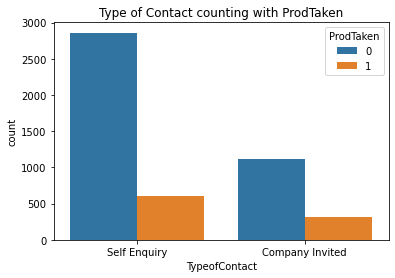

In [44]:
sns.countplot(x='TypeofContact',hue="ProdTaken",data=df)
plt.xlabel=("Type of Contact")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Type of Contact counting with ProdTaken")

In [45]:
df.CityTier.value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

Text(0.5, 1.0, 'City Tier counting')

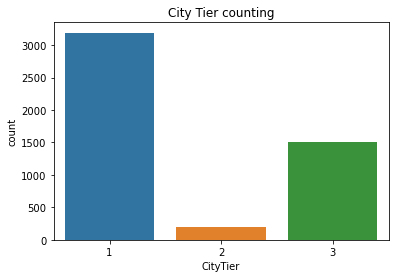

In [46]:
sns.countplot(x='CityTier',data=df)
plt.xlabel=("City Tier")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("City Tier counting")

In [47]:
df.groupby("ProdTaken")["CityTier"].describe()

,count,mean,std,min,25%,50%,75%,max
ProdTaken,,,,,,,,
0,3968.0,1.615927,0.902434,1.0,1.0,1.0,3.0,3.0
1,920.0,1.819565,0.958354,1.0,1.0,1.0,3.0,3.0


Text(0.5, 1.0, 'CityTier counting with ProdTaken')

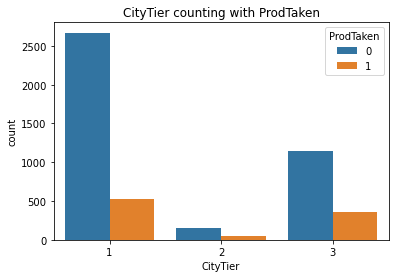

In [48]:
sns.countplot(x='CityTier',hue="ProdTaken",data=df)
plt.xlabel=("CityTier")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("CityTier counting with ProdTaken")

<function matplotlib.pyplot.show(close=None, block=None)>

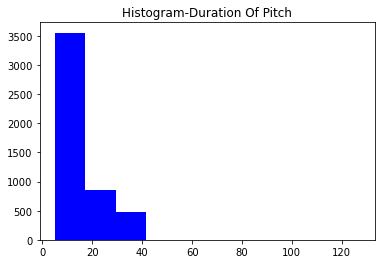

In [49]:
##Histogram
plt.hist(df.DurationOfPitch,color='blue')
plt.title('Histogram-Duration Of Pitch')
plt.show

<AxesSubplot:>

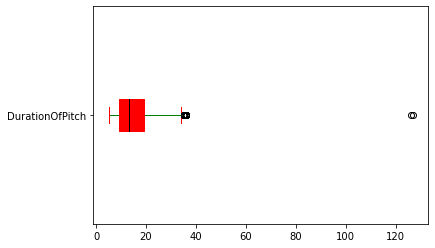

In [50]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.DurationOfPitch.plot.box(color=props2, patch_artist = True, vert = False)

In [51]:
IQR=df.DurationOfPitch.quantile(0.75)-df.DurationOfPitch.quantile(0.25)
LL=df.DurationOfPitch.quantile(0.25)-(1.5*IQR)
UL=df.DurationOfPitch.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  10.0
LL:  -6.0
UL:  34.0


In [52]:
upper_lim_len=len(df.DurationOfPitch[df.DurationOfPitch>UL])
upper_lim_len

112

In [53]:
UpperLimit_perc=upper_lim_len/len(df)
UpperLimit_perc

0.022913256955810146

In [54]:
df=df[df.DurationOfPitch<40]

<AxesSubplot:>

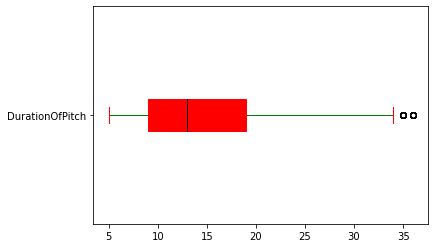

In [55]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.DurationOfPitch.plot.box(color=props2, patch_artist = True, vert = False)

In [56]:
df.Occupation.value_counts()

Salaried          2366
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'Occupation counting')

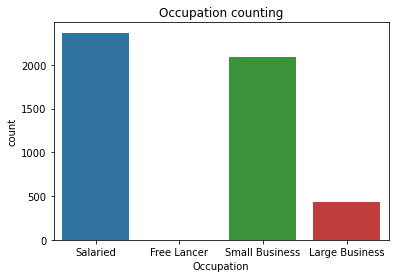

In [57]:
sns.countplot(x='Occupation',data=df)
plt.xlabel=("Occupation")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Occupation counting")

In [58]:
df['Occupation'] =df['Occupation'].replace({'Small Business': 'Business',
                                                           'Large Business': 'Business'})

Text(0.5, 1.0, 'Occupation counting')

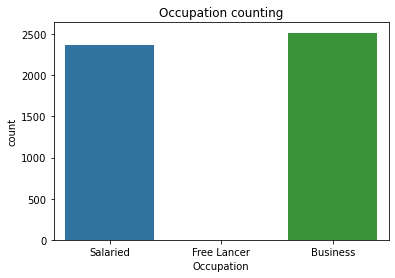

In [59]:
sns.countplot(x='Occupation',data=df)
plt.xlabel=("Occupation")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Occupation counting")

Text(0.5, 1.0, 'Occupation counting with ProdTaken')

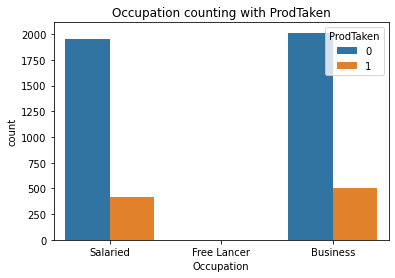

In [60]:
sns.countplot(x='Occupation',hue="ProdTaken",data=df)
plt.xlabel=("Occupation")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Occupation counting with ProdTaken")

In [61]:
df.groupby("ProdTaken")["Occupation"].describe()

,count,unique,top,freq
ProdTaken,,,,
0,3966,2,Business,2014
1,920,3,Business,504


In [62]:
df.Gender.value_counts()

Male       2914
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [63]:
df['Gender'] =df['Gender'].replace({'Fe Male': 'Female'})

In [64]:
df.Gender.value_counts()

Male      2914
Female    1972
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender counting')

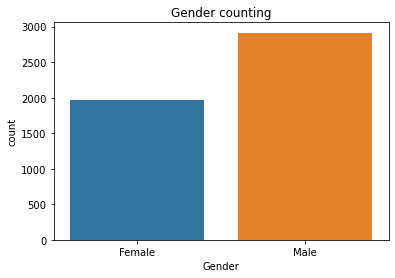

In [65]:
sns.countplot(x='Gender',data=df)
plt.xlabel=("Gender")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Gender counting")

Text(0.5, 1.0, 'Gender counting with ProdTaken')

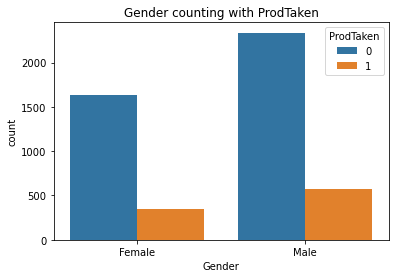

In [66]:
sns.countplot(x='Gender',hue="ProdTaken",data=df)
plt.xlabel=("Gender")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Gender counting with ProdTaken")

In [67]:
df.groupby("ProdTaken")["Gender"].describe()

,count,unique,top,freq
ProdTaken,,,,
0,3966,2,Male,2336
1,920,2,Male,578


Text(0.5, 1.0, 'Occupation counting with Gender')

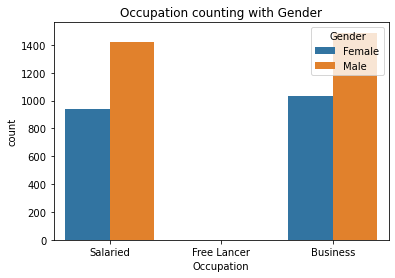

In [68]:
sns.countplot(x='Occupation',hue="Gender",data=df)
plt.xlabel=("Occupation")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Occupation counting with Gender")

In [69]:
df.NumberOfPersonVisiting.value_counts()

3    2401
2    1417
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

Text(0.5, 1.0, 'Person Visiting counting')

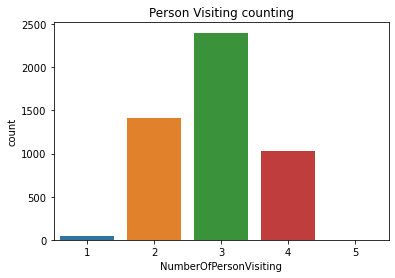

In [70]:
sns.countplot(x='NumberOfPersonVisiting',data=df)
plt.xlabel=("NumberOfPersonVisiting")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Person Visiting counting")

Text(0.5, 1.0, 'Persons visits counting with ProdTaken')

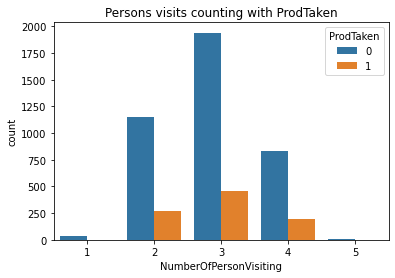

In [71]:
sns.countplot(x='NumberOfPersonVisiting',hue="ProdTaken",data=df)
plt.xlabel=("NumberOfPersonVisiting")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Persons visits counting with ProdTaken")

In [72]:
df.NumberOfFollowups.value_counts()

4.0    2112
3.0    1465
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

Text(0.5, 1.0, 'Followups counting')

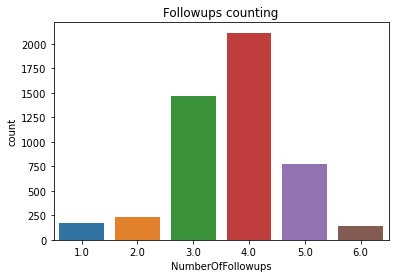

In [73]:
sns.countplot(x='NumberOfFollowups',data=df)
plt.xlabel=("NumberOfFollowups")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Followups counting")

Text(0.5, 1.0, 'Follpow ups counting with ProdTaken')

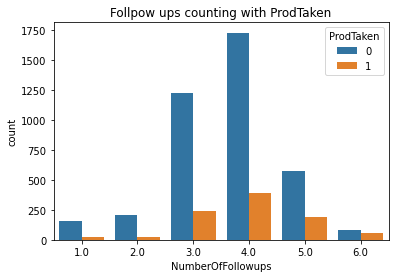

In [74]:
sns.countplot(x='NumberOfFollowups',hue="ProdTaken",data=df)
plt.xlabel=("NumberOfFollowups")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Follpow ups counting with ProdTaken")

In [75]:
df.ProductPitched.value_counts()

Basic           1840
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Text(0.5, 1.0, 'ProductPitched counting')

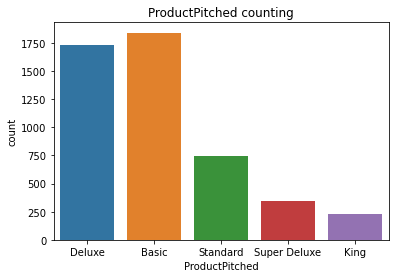

In [76]:
sns.countplot(x='ProductPitched',data=df)
plt.xlabel=("ProductPitched")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("ProductPitched counting")

In [77]:
df.groupby("ProdTaken")["ProductPitched"].describe()

,count,unique,top,freq
ProdTaken,,,,
0,3966,5,Deluxe,1528
1,920,5,Basic,552


Text(0.5, 1.0, 'ProductPitched counting with ProdTaken')

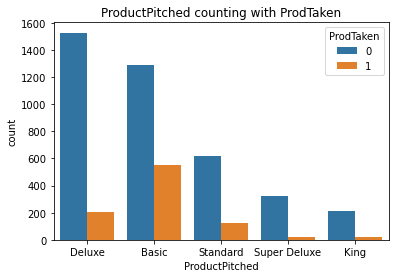

In [78]:
sns.countplot(x='ProductPitched',hue="ProdTaken",data=df)
plt.xlabel=("ProductPitched")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("ProductPitched counting with ProdTaken")

In [79]:
df.PreferredPropertyStar.value_counts()

3.0    3017
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

Text(0.5, 1.0, 'PreferredPropertyStar counting')

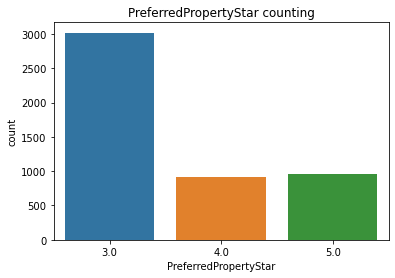

In [80]:
sns.countplot(x='PreferredPropertyStar',data=df)
plt.xlabel=("PreferredPropertyStar")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("PreferredPropertyStar counting")

Text(0.5, 1.0, 'PreferredPropertyStar counting with ProdTaken')

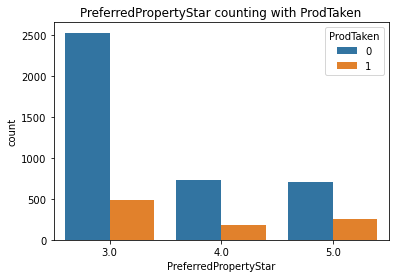

In [81]:
sns.countplot(x='PreferredPropertyStar',hue="ProdTaken",data=df)
plt.xlabel=("PreferredPropertyStar")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("PreferredPropertyStar counting with ProdTaken")

In [82]:
df.MaritalStatus.value_counts()

Married      2338
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [83]:
df['MaritalStatus'] =df['MaritalStatus'].replace({'Unmarried': 'Single','Divorced': 'Single'})

In [84]:
df.MaritalStatus.value_counts()

Single     2548
Married    2338
Name: MaritalStatus, dtype: int64

Text(0.5, 1.0, 'MaritalStatus counting')

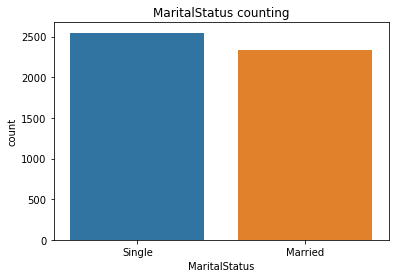

In [85]:
sns.countplot(x='MaritalStatus',data=df)
plt.xlabel=("MaritalStatus")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("MaritalStatus counting")

In [86]:
df.groupby("ProdTaken")["MaritalStatus"].describe()

,count,unique,top,freq
ProdTaken,,,,
0,3966,2,Married,2012
1,920,2,Single,594


Text(0.5, 1.0, 'MaritalStatus counting with ProdTaken')

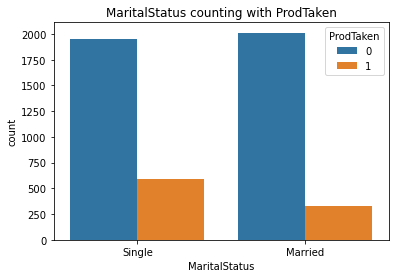

In [87]:
sns.countplot(x='MaritalStatus',hue="ProdTaken",data=df)
plt.xlabel=("MaritalStatus")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("MaritalStatus counting with ProdTaken")

Text(0.5, 1.0, 'MaritalStatus counting with Gender ')

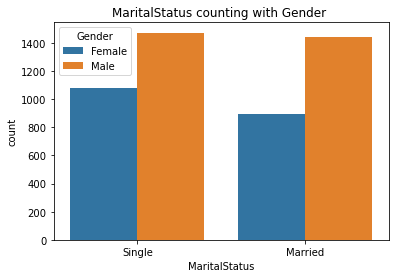

In [88]:
sns.countplot(x='MaritalStatus',hue="Gender",data=df)
plt.xlabel=("MaritalStatus")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("MaritalStatus counting with Gender ")

In [89]:
df.NumberOfTrips.value_counts()

2.0     1604
3.0     1078
1.0      620
4.0      477
5.0      458
6.0      322
7.0      218
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64

Text(0.5, 1.0, 'NumberOfTrips counting')

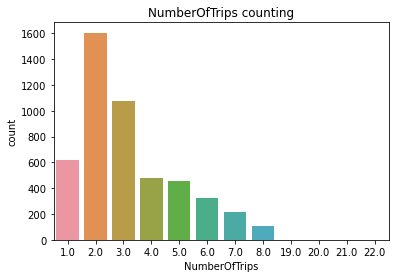

In [90]:
sns.countplot(x='NumberOfTrips',data=df)
plt.xlabel=("NumberOfTrips")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("NumberOfTrips counting")

Text(0.5, 1.0, 'NumberOfTrips with ProdTaken')

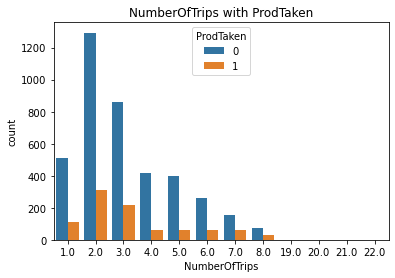

In [91]:
sns.countplot(x='NumberOfTrips',hue="ProdTaken",data=df)
plt.xlabel=("NumberOfTrips")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("NumberOfTrips with ProdTaken")

Text(0.5, 1.0, 'NumberOfTrips  with Gender ')

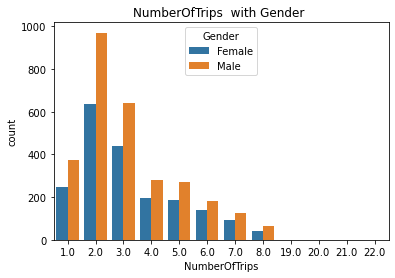

In [92]:
sns.countplot(x='NumberOfTrips',hue="Gender",data=df)
plt.xlabel=("NumberOfTrips")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("NumberOfTrips  with Gender ")

In [93]:
df.Passport.value_counts()

0    3464
1    1422
Name: Passport, dtype: int64

Text(0.5, 1.0, 'Passport counting')

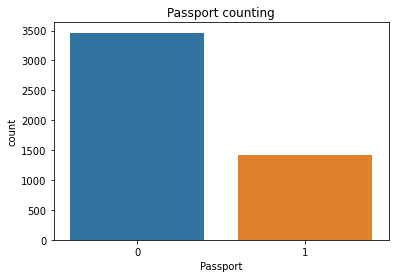

In [94]:
sns.countplot(x='Passport',data=df)
plt.xlabel=("Passport")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Passport counting")

Text(0.5, 1.0, 'Passport counting with ProdTaken')

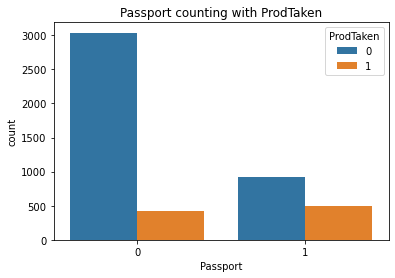

In [95]:
sns.countplot(x='Passport',hue="ProdTaken",data=df)
plt.xlabel=("Passport")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Passport counting with ProdTaken")

Text(0.5, 1.0, 'Passport counting  with Gender ')

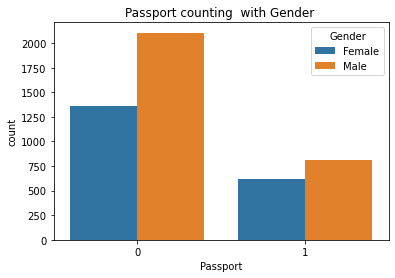

In [96]:
sns.countplot(x='Passport',hue="Gender",data=df)
plt.xlabel=("Passport")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Passport counting  with Gender ")

In [97]:
df.PitchSatisfactionScore.value_counts()

3    1478
5     970
1     940
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64

Text(0.5, 1.0, 'PitchSatisfactionScore counting')

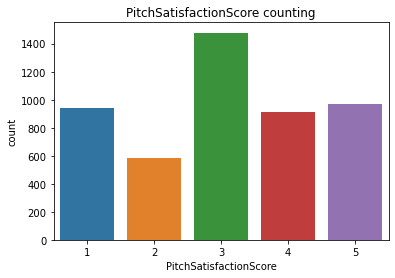

In [98]:
sns.countplot(x='PitchSatisfactionScore',data=df)
plt.xlabel=("PitchSatisfactionScore")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("PitchSatisfactionScore counting")

Text(0.5, 1.0, 'PitchSatisfactionScore with ProdTaken')

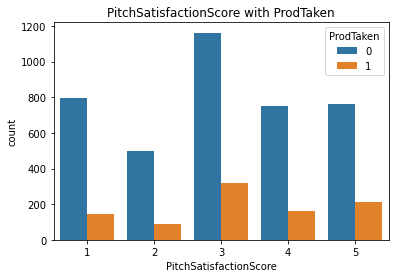

In [99]:
sns.countplot(x='PitchSatisfactionScore',hue="ProdTaken",data=df)
plt.xlabel=("PitchSatisfactionScore")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("PitchSatisfactionScore with ProdTaken")

In [100]:
df.OwnCar.value_counts()

1    3030
0    1856
Name: OwnCar, dtype: int64

Text(0.5, 1.0, 'OwnCar counting')

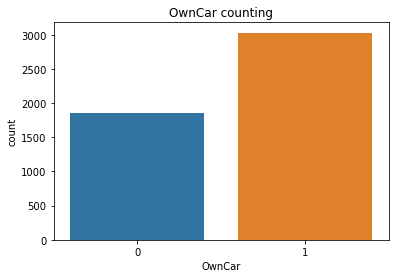

In [101]:
sns.countplot(x='OwnCar',data=df)
plt.xlabel=("OwnCar")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("OwnCar counting")

Text(0.5, 1.0, 'OwnCar with ProdTaken')

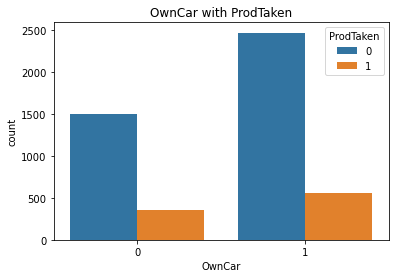

In [102]:
sns.countplot(x='OwnCar',hue="ProdTaken",data=df)
plt.xlabel=("OwnCar")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("OwnCar with ProdTaken")

Text(0.5, 1.0, 'OwnCar counting  with Gender ')

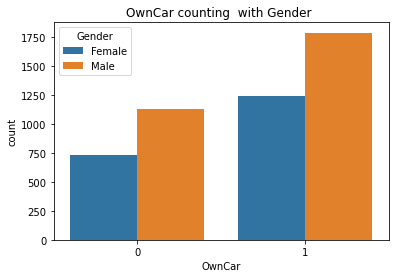

In [103]:
sns.countplot(x='OwnCar',hue="Gender",data=df)
plt.xlabel=("OwnCar")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("OwnCar counting  with Gender ")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4886 non-null   int64  
 1   ProdTaken                 4886 non-null   int64  
 2   Age                       4886 non-null   float64
 3   TypeofContact             4886 non-null   object 
 4   CityTier                  4886 non-null   int64  
 5   DurationOfPitch           4886 non-null   float64
 6   Occupation                4886 non-null   object 
 7   Gender                    4886 non-null   object 
 8   NumberOfPersonVisiting    4886 non-null   int64  
 9   NumberOfFollowups         4886 non-null   float64
 10  ProductPitched            4886 non-null   object 
 11  PreferredPropertyStar     4886 non-null   float64
 12  MaritalStatus             4886 non-null   object 
 13  NumberOfTrips             4886 non-null   float64
 14  Passport

In [105]:
df.NumberOfChildrenVisiting.value_counts()

1.0    2145
2.0    1334
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64

Text(0.5, 1.0, 'NumberOfChildrenVisiting')

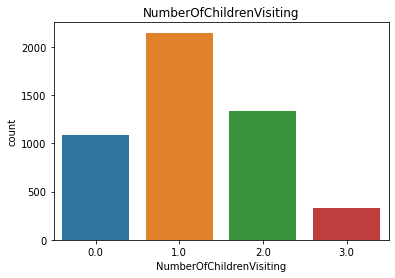

In [106]:
sns.countplot(x='NumberOfChildrenVisiting',data=df)
plt.xlabel=("NumberOfChildrenVisiting")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("NumberOfChildrenVisiting" )

Text(0.5, 1.0, 'NumberOfChildrenVisiting with ProdTaken')

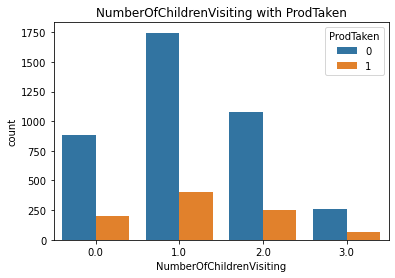

In [107]:
sns.countplot(x='NumberOfChildrenVisiting',hue="ProdTaken",data=df)
plt.xlabel=("NumberOfChildrenVisiting")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("NumberOfChildrenVisiting with ProdTaken")

In [108]:
df.Designation.value_counts()

Executive         1840
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

Text(0.5, 1.0, 'Designation')

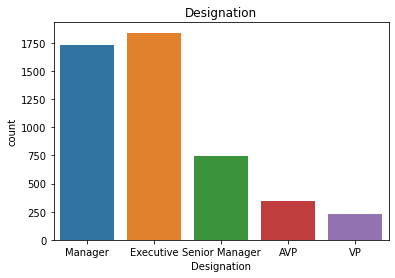

In [109]:
sns.countplot(x='Designation',data=df)
plt.xlabel=("Designation")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Designation" )

In [110]:
df.groupby("ProdTaken")["Designation"].value_counts()

ProdTaken  Designation   
0          Manager           1528
           Executive         1288
           Senior Manager     618
           AVP                322
           VP                 210
1          Executive          552
           Manager            204
           Senior Manager     124
           AVP                 20
           VP                  20
Name: Designation, dtype: int64

In [111]:
df.groupby("ProdTaken")["Designation"].describe()

,count,unique,top,freq
ProdTaken,,,,
0,3966,5,Manager,1528
1,920,5,Executive,552


Text(0.5, 1.0, 'Designation with ProdTaken')

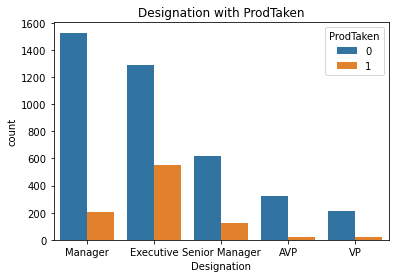

In [112]:
sns.countplot(x='Designation',hue="ProdTaken",data=df)
plt.xlabel=("Designation")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Designation with ProdTaken")

<function matplotlib.pyplot.show(close=None, block=None)>

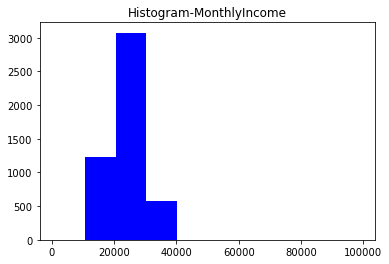

In [113]:
##Histogram
plt.hist(df.MonthlyIncome,color='blue')
plt.title('Histogram-MonthlyIncome')
plt.show

<AxesSubplot:>

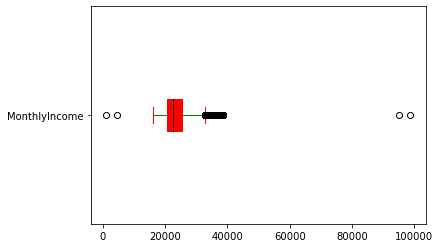

In [114]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.MonthlyIncome.plot.box(color=props2, patch_artist = True, vert = False)

In [115]:
IQR=df.MonthlyIncome.quantile(0.75)-df.MonthlyIncome.quantile(0.25)
LL=df.MonthlyIncome.quantile(0.25)-(1.5*IQR)
UL=df.MonthlyIncome.quantile(0.75)+(1.5*IQR)
print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  4945.0
LL:  13067.75
UL:  32847.75


In [116]:
upper_lim_len=len(df.MonthlyIncome[df.MonthlyIncome>UL])
upper_lim_len

373

In [117]:
UpperLimit_perc=upper_lim_len/len(df)
UpperLimit_perc

0.07634056487924683

In [118]:
lower_lim_len=len(df.MonthlyIncome[df.MonthlyIncome<LL])
lower_lim_len

2

In [119]:
lowerLimit_perc=lower_lim_len/len(df)
lowerLimit_perc

0.00040933278755628325

In [120]:
df=df[df.MonthlyIncome<30000]

<AxesSubplot:>

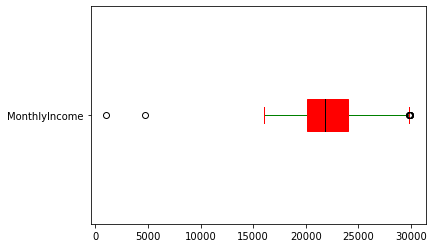

In [121]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.MonthlyIncome.plot.box(color=props2, patch_artist = True, vert = False)

### STATISTICAL ANALYSIS FOR FEATURE VARIABLES

In [122]:
numeric_df = df.copy()
for col in numeric_df:
    numeric_df = numeric_df.select_dtypes(np.number)
numeric_df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,36.0,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0


In [123]:
Categorical_features=df.select_dtypes("object")

### CHI SQUARE TEST

In [124]:
from scipy.stats import chi2_contingency

In [125]:
for i in Categorical_features.columns:
        cross_tab=pd.crosstab(index=df[i],columns=df['ProdTaken'])
        chi_square=chi2_contingency(cross_tab)
        print('P-value for ',i,' : ',chi_square[1])
        alpha=0.05
        if chi_square[1]<alpha:
            print(i,' column will be a good predictor\n')
        else:
            print(i,' column will be a bad predictor\n')

P-value for  TypeofContact  :  0.0012450129797905195
TypeofContact  column will be a good predictor

P-value for  Occupation  :  0.0017464646219608922
Occupation  column will be a good predictor

P-value for  Gender  :  0.03965811591159639
Gender  column will be a good predictor

P-value for  ProductPitched  :  1.3497493139608026e-41
ProductPitched  column will be a good predictor

P-value for  MaritalStatus  :  3.303573592210725e-16
MaritalStatus  column will be a good predictor

P-value for  Designation  :  1.3497493139608026e-41
Designation  column will be a good predictor



In [126]:
df.ProdTaken.value_counts()

0    3436
1     860
Name: ProdTaken, dtype: int64

In [127]:
num=df.select_dtypes(np.number)
num.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

### T-TEST INDEPENDENT

In [128]:
ProdTaken_n = df[df.ProdTaken == 0.0]
ProdTaken_y = df[df.ProdTaken == 1.0]

In [129]:
from scipy import stats

In [130]:
stats.ttest_ind(ProdTaken_n.Age, ProdTaken_y.Age, equal_var=True)

Ttest_indResult(statistic=8.791009339106887, pvalue=2.108579868354696e-18)

In [131]:
stats.ttest_ind(ProdTaken_n.CityTier, ProdTaken_y.CityTier, equal_var=True)

Ttest_indResult(statistic=-5.1603382429920845, pvalue=2.5763400376111885e-07)

In [132]:
stats.ttest_ind(ProdTaken_n.DurationOfPitch, ProdTaken_y.DurationOfPitch, equal_var=True)

Ttest_indResult(statistic=-5.093885440597853, pvalue=3.658496744810964e-07)

In [133]:
stats.ttest_ind(ProdTaken_n.NumberOfPersonVisiting, ProdTaken_y.NumberOfPersonVisiting, equal_var=True)

Ttest_indResult(statistic=-0.5517180666926803, pvalue=0.5811702396403569)

In [134]:
stats.ttest_ind(ProdTaken_n.NumberOfFollowups, ProdTaken_y.NumberOfFollowups, equal_var=True)

Ttest_indResult(statistic=-8.01424058419856, pvalue=1.416106951317928e-15)

In [135]:
stats.ttest_ind(ProdTaken_n.PreferredPropertyStar, ProdTaken_y.PreferredPropertyStar, equal_var=True)

Ttest_indResult(statistic=-6.8016613700495485, pvalue=1.1766241078770204e-11)

In [136]:
stats.ttest_ind(ProdTaken_n.NumberOfTrips, ProdTaken_y.NumberOfTrips, equal_var=True)

Ttest_indResult(statistic=-1.685611996397015, pvalue=0.09194321270259964)

In [137]:
stats.ttest_ind(ProdTaken_n.Passport, ProdTaken_y.Passport, equal_var=True)

Ttest_indResult(statistic=-18.48858922655844, pvalue=1.697669001330566e-73)

In [138]:
stats.ttest_ind(ProdTaken_n.PitchSatisfactionScore, ProdTaken_y.PitchSatisfactionScore, equal_var=True)

Ttest_indResult(statistic=-3.897962876905462, pvalue=9.848489595183306e-05)

In [139]:
stats.ttest_ind(ProdTaken_n.OwnCar, ProdTaken_y.OwnCar, equal_var=True)

Ttest_indResult(statistic=1.0699883721833083, pvalue=0.28468468305429334)

In [140]:
stats.ttest_ind(ProdTaken_n.NumberOfChildrenVisiting, ProdTaken_y.NumberOfChildrenVisiting, equal_var=True)

Ttest_indResult(statistic=-0.3951190580280467, pvalue=0.6927746506179839)

In [141]:
stats.ttest_ind(ProdTaken_n.MonthlyIncome, ProdTaken_y.MonthlyIncome, equal_var=True)

Ttest_indResult(statistic=7.918998345174811, pvalue=3.025419094877761e-15)

In [142]:
df_holiday=df.copy()

### DROPPING UNNECESSARY COLUMNS

In [143]:
df_holiday=df_holiday.drop(["NumberOfPersonVisiting","CustomerID","NumberOfTrips","NumberOfFollowups","PitchSatisfactionScore","DurationOfPitch","NumberOfChildrenVisiting"],axis=1)

In [144]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 0 to 4887
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProdTaken              4296 non-null   int64  
 1   Age                    4296 non-null   float64
 2   TypeofContact          4296 non-null   object 
 3   CityTier               4296 non-null   int64  
 4   Occupation             4296 non-null   object 
 5   Gender                 4296 non-null   object 
 6   ProductPitched         4296 non-null   object 
 7   PreferredPropertyStar  4296 non-null   float64
 8   MaritalStatus          4296 non-null   object 
 9   Passport               4296 non-null   int64  
 10  OwnCar                 4296 non-null   int64  
 11  Designation            4296 non-null   object 
 12  MonthlyIncome          4296 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 469.9+ KB


### LABEL ENCODING TARGET VARIABLE

In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
le=LabelEncoder()
df_holiday['TypeofContact']=le.fit_transform(df_holiday['TypeofContact'])
df_holiday['Occupation']=le.fit_transform(df_holiday['Occupation'])
df_holiday['ProductPitched']=le.fit_transform(df_holiday['ProductPitched'])
df_holiday['Designation']=le.fit_transform(df_holiday['Designation'])



In [147]:
df_holiday['MaritalStatus']=le.fit_transform(df_holiday['MaritalStatus'])

In [148]:
df_holiday['Gender'] =df_holiday['Gender'].replace({'Male': 1,
                                                           'Female': 0})

### BALANCING THE TARGET VARIABLE USIN SMOTE

In [149]:
ProdTaken_n = df_holiday[df_holiday.ProdTaken == 0.0]
len(ProdTaken_n)

3436

In [150]:
ProdTaken_y = df_holiday[df_holiday.ProdTaken == 1.0]
len(ProdTaken_y)

860

In [151]:
from sklearn.utils import resample
ProdTaken_upsampled1 = resample(ProdTaken_y,
                          replace=True, # sample with replacement
                          n_samples=len(ProdTaken_n), 
                          random_state=27) # reproducible results
ProdTaken_upsampled1

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,MonthlyIncome
124,1,31.0,1,3,2,1,1,3.0,1,1,1,2,21172.000000
4130,1,31.0,0,3,0,0,1,5.0,1,0,1,2,25374.000000
4863,1,40.0,1,3,2,1,0,3.0,0,1,1,1,23212.000000
3139,1,38.0,1,3,2,1,3,3.0,1,0,1,3,29287.000000
4843,1,29.0,0,3,0,0,1,4.0,1,0,1,2,22545.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,1,23.0,0,3,2,0,0,4.0,1,1,1,1,16223.000000
1186,1,35.0,0,3,2,1,1,3.0,1,1,1,2,19581.000000
911,1,25.0,0,3,2,1,0,3.0,1,1,1,1,16118.000000
4806,1,20.0,0,1,0,0,0,4.0,1,1,0,1,20537.000000


In [222]:
df_Product = pd.concat([ProdTaken_n, ProdTaken_upsampled1]) 
df_Product

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,MonthlyIncome
1,0,49.0,0,1,2,1,1,4.0,1,0,1,2,20130.000000
3,0,33.0,0,1,2,0,0,3.0,1,1,1,1,17909.000000
4,0,36.0,1,1,0,1,0,4.0,1,0,1,1,18468.000000
5,0,32.0,0,1,2,1,0,3.0,1,0,1,1,18068.000000
6,0,59.0,1,1,0,0,0,5.0,1,1,1,1,17670.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,1,23.0,0,3,2,0,0,4.0,1,1,1,1,16223.000000
1186,1,35.0,0,3,2,1,1,3.0,1,1,1,2,19581.000000
911,1,25.0,0,3,2,1,0,3.0,1,1,1,1,16118.000000
4806,1,20.0,0,1,0,0,0,4.0,1,1,0,1,20537.000000


In [223]:
df_Product.ProdTaken.value_counts()

1    3436
0    3436
Name: ProdTaken, dtype: int64

## MODEL BUILDING

In [224]:
x=df_Product.drop(["ProdTaken"],axis=1)
y=df_Product["ProdTaken"]

In [225]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [226]:
print("xtrain :",xtrain.shape)
print("xtest :",xtest.shape)
print("ytrain :",ytrain.shape)
print("ytest :",ytest.shape)

xtrain : (5154, 12)
xtest : (1718, 12)
ytrain : (5154,)
ytest : (1718,)


### LOGISTIC REGRESSION

In [227]:
lr=LogisticRegression()
lrmodel=lr.fit(xtrain,ytrain)


In [228]:
Logiestic_pred=lrmodel.predict(xtest)
Logiestic_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [159]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [229]:
confusion_matrix(ytest,Logiestic_pred)

array([[584, 259],
       [312, 563]], dtype=int64)

In [230]:
print(classification_report(ytest,Logiestic_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       843
           1       0.68      0.64      0.66       875

    accuracy                           0.67      1718
   macro avg       0.67      0.67      0.67      1718
weighted avg       0.67      0.67      0.67      1718



In [233]:
acc_lr=accuracy_score(ytest,Logiestic_pred)*100
acc_lr=round(acc_lr,2)
acc_lr

66.76

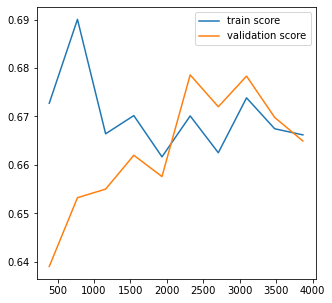

In [162]:
 N, train_score, test_score = learning_curve(lrmodel, xtrain, ytrain, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(5,5))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, test_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()


### DECISION TREE

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [234]:
dtc=DecisionTreeClassifier()
dtcmodel=dtc.fit(xtrain,ytrain)


In [235]:
Tree_pred=dtcmodel.predict(xtest)
Tree_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [236]:
confusion_matrix(ytest,Tree_pred)

array([[749,  94],
       [ 10, 865]], dtype=int64)

In [237]:
print(classification_report(ytest,Tree_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       843
           1       0.90      0.99      0.94       875

    accuracy                           0.94      1718
   macro avg       0.94      0.94      0.94      1718
weighted avg       0.94      0.94      0.94      1718



In [239]:
acc_dtc=accuracy_score(ytest,Tree_pred)*100
acc_dtc=round(acc_dtc,2)
acc_dtc

93.95

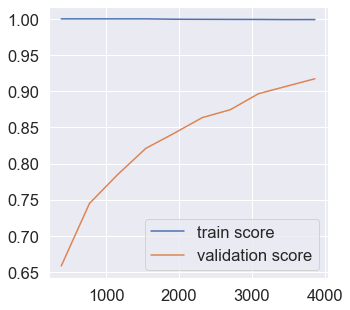

In [220]:
 N, train_score, test_score = learning_curve(dtcmodel, xtrain, ytrain, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(5,5))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, test_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()


### RANDOM FOREST

In [240]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=1000)

In [241]:
RF_pred=model.predict(xtest)

In [242]:
confusion_matrix(ytest,RF_pred)

array([[785,  58],
       [ 12, 863]], dtype=int64)

In [243]:
print(classification_report(ytest,RF_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       843
           1       0.94      0.99      0.96       875

    accuracy                           0.96      1718
   macro avg       0.96      0.96      0.96      1718
weighted avg       0.96      0.96      0.96      1718



In [244]:
acc_RF=accuracy_score(ytest,RF_pred)*100
acc_RF=round(acc_RF,2)
acc_RF

95.93

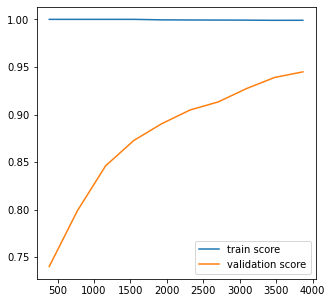

In [172]:
 N, train_score, test_score = learning_curve(model, xtrain, ytrain, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(5,5))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, test_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()


### KNN

In [245]:
knn=KNeighborsClassifier(n_neighbors=4)
knnmodel=knn.fit(xtrain,ytrain)

knn_pred=knnmodel.predict(xtest)
knn_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [246]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       843
           1       0.81      0.87      0.84       875

    accuracy                           0.83      1718
   macro avg       0.83      0.83      0.83      1718
weighted avg       0.83      0.83      0.83      1718



In [247]:
acc_knn=accuracy_score(ytest,knn_pred)*100
acc_knn=round(acc_knn,2)
acc_knn

82.95

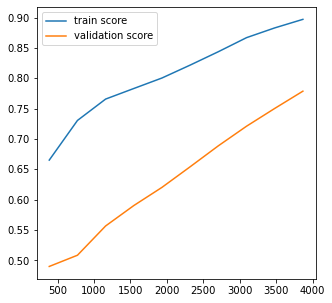

In [175]:
 N, train_score, test_score = learning_curve(knnmodel, xtrain, ytrain, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(5,5))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, test_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()


## PCA

In [179]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [180]:
X=df_Product.drop('ProdTaken',axis=1)
X

,Age,TypeofContact,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,MonthlyIncome
1,49.0,0,1,2,1,1,4.0,1,0,1,2,20130.000000
3,33.0,0,1,2,0,0,3.0,1,1,1,1,17909.000000
4,36.0,1,1,0,1,0,4.0,1,0,1,1,18468.000000
5,32.0,0,1,2,1,0,3.0,1,0,1,1,18068.000000
6,59.0,1,1,0,0,0,5.0,1,1,1,1,17670.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2380,23.0,0,3,2,0,0,4.0,1,1,1,1,16223.000000
1186,35.0,0,3,2,1,1,3.0,1,1,1,2,19581.000000
911,25.0,0,3,2,1,0,3.0,1,1,1,1,16118.000000
4806,20.0,0,1,0,0,0,4.0,1,1,0,1,20537.000000


In [181]:
X=X.values
X

array([[4.90000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 2.00000000e+00, 2.01300000e+04],
       [3.30000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.79090000e+04],
       [3.60000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.84680000e+04],
       ...,
       [2.50000000e+01, 0.00000000e+00, 3.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.61180000e+04],
       [2.00000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.05370000e+04],
       [3.60000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.36198535e+04]])

In [182]:
X=scale(X)
X

array([[ 1.52850553, -1.4936002 , -0.76964747, ...,  0.8145672 ,
         0.50424542, -0.53337164],
       [-0.26785647, -1.4936002 , -0.76964747, ...,  0.8145672 ,
        -0.82748961, -1.21718331],
       [ 0.0689614 ,  0.66952321, -0.76964747, ...,  0.8145672 ,
        -0.82748961, -1.04507583],
       ...,
       [-1.16603747, -1.4936002 ,  1.36087314, ...,  0.8145672 ,
        -0.82748961, -1.76860461],
       [-1.7274006 , -1.4936002 , -0.76964747, ..., -1.22764579,
        -0.82748961, -0.40806262],
       [ 0.0689614 ,  0.66952321, -0.76964747, ..., -1.22764579,
        -0.82748961,  0.54110046]])

In [183]:
pca=PCA(n_components=12)
pca.fit(X)

PCA(n_components=12)

In [184]:
var=pca.explained_variance_ratio_
var

array([0.2236417 , 0.09937176, 0.09254957, 0.08754954, 0.08388276,
       0.08140859, 0.07865634, 0.07592947, 0.06797769, 0.0561292 ,
       0.0361442 , 0.01675919])

In [185]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([22.36, 32.3 , 41.55, 50.3 , 58.69, 66.83, 74.7 , 82.29, 89.09,
       94.7 , 98.31, 99.99])

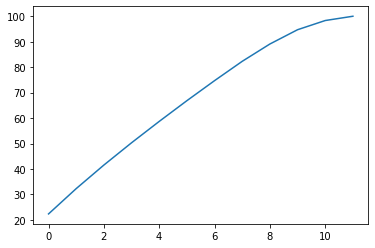

In [186]:
plt.plot(var1)

In [187]:
pca_ev=pca.components_
pca_ev

array([[ 0.33055102,  0.00303821,  0.21396851, -0.06362521, -0.00842255,
         0.55385829, -0.01578495, -0.07288837, -0.08065944,  0.05729731,
         0.51894265,  0.49941354],
       [ 0.32083351, -0.16164854, -0.55067603,  0.53561825,  0.26025387,
         0.01702294, -0.27771306, -0.32938203,  0.02564079,  0.13084248,
        -0.06170414,  0.07470662],
       [-0.09530092, -0.48536753,  0.12611146,  0.36283387, -0.42465215,
         0.04871702, -0.24615642,  0.50822106,  0.24592778,  0.20506022,
         0.02250456,  0.05623645],
       [-0.1244514 ,  0.0204317 , -0.27898155,  0.19012679, -0.22621357,
         0.040176  ,  0.58408786,  0.10147089, -0.5330466 ,  0.42298143,
         0.04153303,  0.03311911],
       [ 0.13967447,  0.39426725, -0.17143824,  0.33123885, -0.51938358,
         0.03975242,  0.25669718, -0.04147608,  0.2862163 , -0.51196823,
         0.0483437 ,  0.02474913],
       [-0.07433014, -0.5203809 ,  0.0429938 ,  0.02030927, -0.16206684,
        -0.00501417, -

In [188]:
pca_evl=pca.explained_variance_
pca_evl

array([2.68409093, 1.19263462, 1.11075643, 1.05074742, 1.00673966,
       0.97704526, 0.94401347, 0.9112862 , 0.81585097, 0.67364843,
       0.43379352, 0.20113957])

In [255]:
pca=PCA(n_components=7)
pca.fit(x)
x1=pca.fit_transform(X)
x1

array([[ 0.37347446,  1.54290971,  0.82976573, ..., -0.84397096,
         0.29666163, -0.09404772],
       [-1.88801566,  0.83864859,  2.56791478, ...,  0.13151324,
        -0.26372321,  0.5547399 ],
       [-1.42703288, -0.32117693, -0.91218533, ..., -0.97284935,
        -0.77336242, -0.76097815],
       ...,
       [-2.02175188, -0.1287993 ,  2.01800558, ..., -1.44080835,
        -0.41370457,  0.46594519],
       [-1.97501364, -1.24981553,  1.30545033, ...,  0.6419269 ,
         0.86632613,  1.19099954],
       [-0.77073184,  0.2481609 , -1.76192194, ...,  0.7849739 ,
        -0.3523951 ,  0.98458516]])

In [256]:
x1=np.round(x1,2)
x1

array([[ 0.37,  1.54,  0.83, ..., -0.84,  0.3 , -0.09],
       [-1.89,  0.84,  2.57, ...,  0.13, -0.26,  0.55],
       [-1.43, -0.32, -0.91, ..., -0.97, -0.77, -0.76],
       ...,
       [-2.02, -0.13,  2.02, ..., -1.44, -0.41,  0.47],
       [-1.98, -1.25,  1.31, ...,  0.64,  0.87,  1.19],
       [-0.77,  0.25, -1.76, ...,  0.78, -0.35,  0.98]])

In [257]:
y=df_Product['ProdTaken']

In [258]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=121)

### LOGISTIC REGRESSION USING PCA

In [248]:
lr=LogisticRegression()
PCA_lrmodel=lr.fit(x_train,y_train)


In [216]:
Logiestic_PCA_pred=PCA_lrmodel.predict(x_test)
Logiestic_PCA_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [217]:
confusion_matrix(y_test,Logiestic_PCA_pred)

array([[602, 247],
       [283, 586]], dtype=int64)

In [218]:
print(classification_report(y_test,Logiestic_PCA_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       849
           1       0.70      0.67      0.69       869

    accuracy                           0.69      1718
   macro avg       0.69      0.69      0.69      1718
weighted avg       0.69      0.69      0.69      1718



In [249]:
acc_PCA_lr=accuracy_score(y_test,Logiestic_PCA_pred)*100
acc_PCA_lr=round(acc_PCA_lr,2)
acc_PCA_lr

69.15

### KNN USING PCA

In [219]:
knn=KNeighborsClassifier(n_neighbors=4)
PCA_knnmodel=knn.fit(x_train,y_train)

PCA_knn_pred=PCA_knnmodel.predict(x_test)
PCA_knn_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [220]:
print(classification_report(y_test,PCA_knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       849
           1       0.85      0.89      0.87       869

    accuracy                           0.87      1718
   macro avg       0.87      0.87      0.87      1718
weighted avg       0.87      0.87      0.87      1718



In [250]:
acc_PCA_knn=accuracy_score(y_test,PCA_knn_pred)*100
acc_PCA_knn=round(acc_PCA_knn,2)
acc_PCA_knn

86.55

### ACCURACY COMPARISION 

In [251]:
Accuracy_comp_df=pd.DataFrame({'Classification Model':['LOGISTIC REGRESSION','DECISION TREE',
                                                  'RANDOM FOREST','K-NEAREST NEIGHBOUR','LOGISTIC REGRESSION WITH PCA','K-NEAREST NEIGHBOUR WITH PCA'],
                          'Accuracy':[acc_lr,acc_dtc,acc_RF,acc_knn,acc_PCA_lr,acc_PCA_knn]})
Accuracy_comp_df

,Classification Model,Accuracy
0,LOGISTIC REGRESSION,66.76
1,DECISION TREE,93.95
2,RANDOM FOREST,95.93
3,K-NEAREST NEIGHBOUR,82.95
4,LOGISTIC REGRESSION WITH PCA,69.15
5,K-NEAREST NEIGHBOUR WITH PCA,86.55
